# Theoretical Neuroscience - Chapter 1 Exercises
## Table of Contents
- [Exercise 1](##exercise-1)
    - [Exercise 1.1](##solution-1.1)
    - [Exercise 1.2](##solution-1.2)
    - [Exercise 1.3](##solution-1.3)
    - [Exercise 1.4](##solution-1.4)
- [Exercise 2](##exercise-2)
    - [Exercise 2.1](##solution-2.1)
    - [Exercise 2.2](##solution-2.2)
    - [Exercise 2.3](##solution-2.3)
    - [Exercise 2.4](##solution-2.4)
- [Exercise 3](##exercise-3)
    - [Exercise 3.1](##solution-3.1)
    - [Exercise 3.2](##solution-3.2)
    - [Exercise 3.3](##solution-3.3)
    - [Exercise 3.4](##solution-3.4)
- [Exercise 4](##exercise-4)
    - [Exercise 4.1](##solution-4.1)
    - [Exercise 4.2](##solution-4.2)
    - [Exercise 4.3](##solution-4.3)
- [Exercise 5](##exercise-5)
- [Exercise 6](##exercise-6)
    - [Exercise 6.1](##solution-6.1)
    - [Exercise 6.2](##solution-6.2)
    - [Exercise 6.3](##solution-6.3)
- [Exercise 7](##exercise-7)
    - [Exercise 7.1](##solution-7.1)
    - [Exercise 7.2](##solution-7.2)
    - [Exercise 7.3](##solution-7.3)
    - [Exercise 7.4](##solution-7.4)
    - [Exercise 7.5](##solution-7.5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1
1. Generate spikes for 10 s (or longer if you want better statistics) using a Poisson spike generator with a constant rate of 100 Hz, and record their times of occurrence. 
2. Compute the coefficient of variation of the interspike intervals.
3. Calculate the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms. 
4. Plot the interspike interval histogram.

## Solution 1.1
By choosing a small enough time step ($dt$), such that the probability of two spikes occuring during a single time step is neglibly small, we can generate spikes as a Poisson process by comparing the firing rate at timestep $i$ ($r[i]\cdot dt$) to a pseudo-randomly generated number $x$ and at each timestep generate a spike if the firing rate at $i$ is greater than $x$.

In [3]:
def generate_poisson_spikes(r, T, dt=1e-5, as_times = True):
    """
    Generates a spike train as a Poisson process.

    Parameters
    ----------
    r : {float, array_like}
        The firing rate in Hz. 
        If a float is given a constant firing rate is used.
        If an array is given the value at index i is the firing rate at time step i.
    T : float
        The duration of time to generate spikes for.
    dt : float
        The time step size.
   
    Returns
    -------
    spikes : array_like
        A list of times at which spikes were generated.
    """

    #Since the probability at each time step is intependent we can compare the firing rates at all time steps simultaneously.
    spikes = np.where(r*dt >= np.random.rand(int(T/dt)), 1, 0)

    # To convert from a list where a 1 at index i indicates a spike at time step i, to a list of times at which spikes occur
    # we simply select all indices at which a spike occurs and multiply the index by the time step size.  
    if as_times:
        spikes = np.linspace(0,T, int(T/dt), endpoint=False)[np.where(spikes == 1)]
    return spikes

In [4]:
spikes = generate_poisson_spikes(100, 60)

## Solution 1.2
To calculate the coefficient of variation of the interspike intervals we must first calculate the interspike intervals. We can then compute the mean interspike interval $\langle \tau \rangle$ and the standard deviation $\sigma_\tau$ and finally calculate the coefficient of variation as $$C_v = \frac{\sigma_{\tau}}{\langle \tau \rangle}.$$

In [5]:
def get_interspike_intervals(spikes):
        """
        Calculates the interspike intervals for the generated spike train.
        
        Parameters
        ----------
        spikes : array_like
            A list of times at which spikes occured.

        Returns
        -------
        interspike_intervals : list
            A list containing the interspike interval durations in seconds. 
        """
        # By offsetting the array by 1 and subtracting we get the difference between each element and the one preceding it.
        interspikes_intervals = spikes[1:] - spikes[:-1]        
        return interspikes_intervals

In [6]:
def get_coefficient_of_variation(x):
    """
    Calculates the coefficient of variation of an array.

    Parameters
    ----------
    x : array_like
        An array of numbers.
    
    Returns
    -------
    cv : float
        The coefficient of variation.
    """
    
    cv = np.std(x)/np.mean(x)
    return cv

In [7]:
interspike_intervals = get_interspike_intervals(spikes)
cv = get_coefficient_of_variation(interspike_intervals)
cv

1.0032800505355874

Which as expected for a homogenous Poisson process is approximately 1.

## Solution 1.3
To calculate the Fano factor for a spike train we divide the trial into some intervals of a fixed length and evaluate the spike count within each interval. The Fano factor is then just the ratio of the variance of the spike counts to the mean of the spike counts. 

In [8]:
def get_fano_factor(spikes, counting_interval):
    """
    Calculates the Fano factor of a spike train.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occured.
    counting_interval : float
        The size of the bins to use when evaluating spike counts.
    
    Returns
    -------
    fano_factor : float
        The fano factor of the spike train.
    """

    bins = np.arange(0, max(spikes) + max(spikes % counting_interval), counting_interval)
    counts = np.histogram(spikes, bins)[0]
    fano_factor = np.var(counts)/np.mean(counts)
    return fano_factor

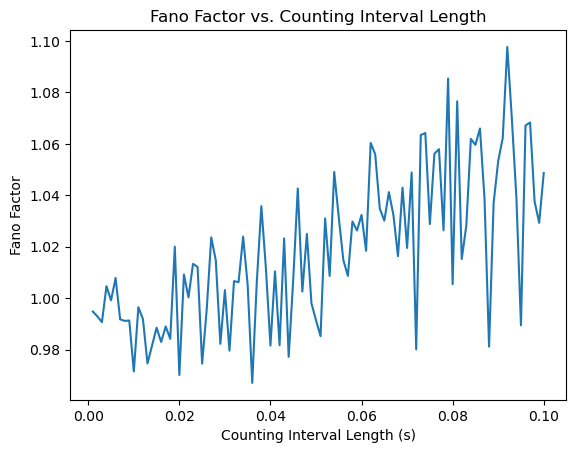

In [9]:
counting_intervals = [i*0.001 for i in range(1,101)]
fano_factors = [get_fano_factor(spikes, t) for t in counting_intervals]
plt.plot(counting_intervals, fano_factors)
plt.ylabel("Fano Factor")
plt.xlabel("Counting Interval Length (s)")
plt.title("Fano Factor vs. Counting Interval Length");

And as expected for a Poisson process the Fano Factor is approximately 1.

## Solution 1.4
Finally, all that remains is to plot the interspike interval histogram.

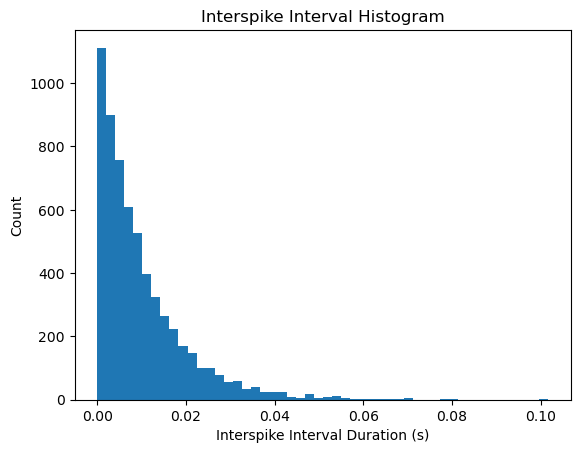

In [10]:
plt.hist(interspike_intervals, bins = 50)
plt.xlabel("Interspike Interval Duration (s)")
plt.ylabel("Count")
plt.title("Interspike Interval Histogram");

And as expected the distribution of interspike intervals is an exponential.

## Exercise 2
1. Add a refractory period to the Poisson spike generator by allowing
the firing rate to depend on time. Initially, set the firing rate to a
constant value, $r(t) = r_0$. After every spike, set $r(t)$ to $0$, and then allow it to recover exponentially back to $r_0$ with a time constant that controls the refractory recovery rate. In other words, have $r(t)$ obey the equation $\tau_{\text{ref}} \frac{dr}{dt} = r_0 -r$ except immediately after a spike, when it is set to $0$. 

2. Plot the coefficient of variation as a function of $\tau_\text{ref}$ over the range $1\text{ ms} \leq \tau_\text{ref} \leq 20 \text{ ms}$.
3. Plot interspike interval histograms for a few different values of $\tau_\text{ref}$ in this range. 
4. Compute the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms for the case $\tau_\text{ref}=10$ ms.

## Solution 2.1
We may use the same technique as in [exercise 1.1](##solution-1.1) to generate spikes, however now the firing rate at time step $i+1$ is dependent on the firing rate at time step $i$, so we must generate spikes in sequence instead of concurrently.

In [28]:
def generate_poisson_spikes_with_refractory_period(r, tau, T, dt=1e-5 as_times = True):
    """
    Generates a spike train as a Poisson process.

    Parameters
    ----------
    r : float
        The firing rate in Hz.
    tau : float 
        The time constant that controls the refractory recovery rate.
    T : float
        The duration of time to generate spikes for.
    dt : float
        The time step size.
    as_times : boolean
        A boolean flag to indicate if the spike train should be returned as a list of times at which spikes were generated. (Default is True)

    Returns
    -------
    spikes : array_like
        A list of times at which spikes were generated.
    """

    ## Since the firing rate is dependent on when spikes occur we generate spikes in series.
    spikes = np.zeros(int(T/dt))
    r0 = r
    r = np.zeros(len(spikes))

    for i in range(len(spikes)):
        if i == 0:
            r[i] = r0
        else:
            r[i] = r[i-1] + (r0-r[i-1])*dt/tau

        if r[i] *dt > np.random.rand():
            spikes[i] = 1
            r[i] = 0
        
    # To convert from a list where a 1 at index i indicates a spike at time step i, to a list of times at which spikes occur
    # we simply select all indices at which a spike occurs and multiply the index by the time step size.  
    if as_times:
        spikes = np.linspace(0,T, int(T/dt), endpoint=False)[np.where(spikes == 1)]
    return spikes

## Solution 2.2
To plot the coefficient of variation as a function of $\tau_\text{ref}$ we simply generate spikes for values of $\tau_\text{ref}$ in the range $1 \text{ ms} \leq \tau_\text{ref} \leq 20 \text{ ms}$ and calculate the coefficient of variation of the resulting interspike intervals.

10 0.001 10000
10 0.002 5000
10 0.003 3333
10 0.004 2500
10 0.005 2000
10 0.006 1666
10 0.007 1428
10 0.008 1250
10 0.009000000000000001 1111
10 0.01 1000
10 0.011 909
10 0.012 833
10 0.013000000000000001 769
10 0.014 714
10 0.015 666
10 0.016 625
10 0.017 588
10 0.018000000000000002 555
10 0.019 526
10 0.02 500


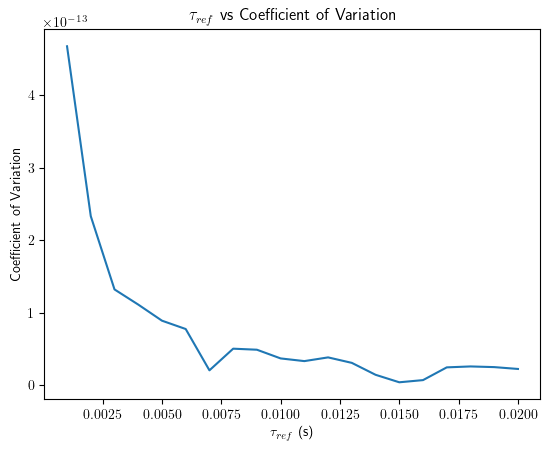

In [29]:
cvs = []
taus = [tau * 0.001 for tau in range(1, 21)]
intervals = []
for tau in taus:
    spikes = generate_poisson_spikes_with_refractory_period(100, 10, 1e-5, tau)
    interspike_intervals = get_interspike_intervals(spikes)
    intervals.append(interspike_intervals)
    cv = get_coefficient_of_variation(interspike_intervals)
    cvs.append(cv)

plt.rcParams['text.usetex'] = True
plt.plot(taus, cvs)
plt.xlabel(r'$\tau_{ref}$ (s)')
plt.ylabel("Coefficient of Variation")
plt.title(r'$\tau_{ref}$ vs Coefficient of Variation');

We can see from the plot above that as $\tau_\text{ref}$ increases the coefficient of variation decreases.

## Solution 2.3
We can use the interspike intervals calculated in the previous part to generate histograms for different value of $\tau_\text{ref}$ in the range $1 \text{ ms} \leq \tau_\text{ref} \leq 20 \text{ ms}$.

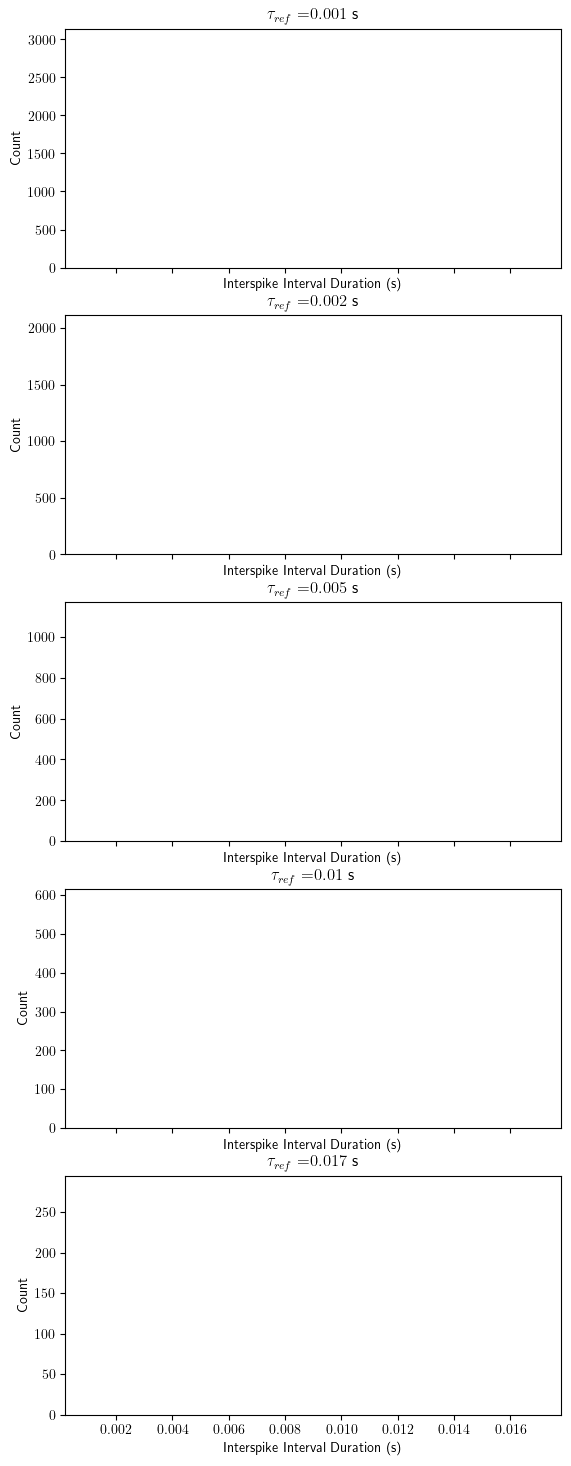

In [24]:
samples = [0,1,4,9,16]
fig, axs = plt.subplots(len(samples), sharex= True)
fig.set_figheight(18)

for i in range(len(samples)):
    axs[i].hist(intervals[samples[i]], bins = 50)
    axs[i].set_title(r'$\tau_{ref}=$' + r'${}$ s'.format(taus[samples[i]]))
    axs[i].set_xlabel("Interspike Interval Duration (s)")
    axs[i].set_ylabel("Count")


In [27]:
spikes

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

We can see from the plots above that as $\tau_{\text{ref}}$ increases, the kurtosis declines. This makes intuitive sense as the time taken for the firing rate to recover increases, which means that larger interspike intervals would be more common.

## Solution 1.4
Finally we can compute the Fano Factor for varying counting intervals by generating a single spike train with $\tau_{\text{ref}}=10$ ms and calculating spike counts for the different counting intervals.

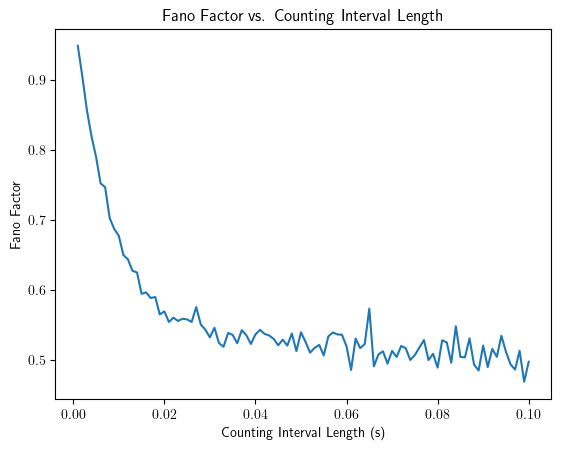

In [14]:
spikes = generate_poisson_spikes_with_refractory_period(100, 60, 0.01)
counting_intervals = [i*0.001 for i in range(1,101)]
fano_factors = [get_fano_factor(spikes, t) for t in counting_intervals]

plt.plot(counting_intervals, fano_factors)
plt.ylabel("Fano Factor")
plt.xlabel("Counting Interval Length (s)")
plt.title("Fano Factor vs. Counting Interval Length");

## Exercise 3
Compute autocorrelation histograms of spike trains generated by:
- A Poisson generator with a constant firing rate of 100 Hz.
- A constant firing rate of 100 Hz together with a refractory period modeled as in exercise 2 with $\tau_\text{ref} = 10$ ms. 
- A variable firing rate $r(t) =100(1 + cos(2\pi t=25 \text{ ms}))$ Hz. 
And plot the histograms over a range from 0 to 100 ms.

## Solution 3
The first step is to implement a function which given a set of spike times outputs a neural response array where the value at index i is the number of spikes at time step i.

Using this neural response array we can compute the autocorrelation at time $\tau$ as the rate at which spikes occur separated by $tau$ seconds relative to the average firing rate.

In [15]:
def get_neural_response(spikes, T, dt=1e-5):
    """
    Calculates the neural response.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occur.
    T : float
        The duration of time simulated in seconds.
    dt : float
        The time step size to use.

    Returns
    -------
    rho : array_like
        neural response array where the value at index i is the number of spikes at time step i.
    """

    bins = np.linspace(0, T, int(T/dt)+1)
    rho = np.histogram(spikes, bins)[0]

    return rho

In [16]:
def get_spike_train_autocorrelation(spikes, T, tau):
    """
    Calculates the autocorrelation of a spike train given a lag time.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occur.
    T : float
        The duration of time simulated in seconds.
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The autocorrelation of the spike train given a lag of tau.
    """

    rho = get_neural_response(spikes, T)
    r = np.mean(rho)
    rho_tau = get_neural_response((spikes + tau)%T, T)

    q = (1/T)*np.sum((rho - r)*(rho_tau - r))

    return q


Now we just need to simulate the spike trains as described and generate the resulting autocorrelation histograms.

KeyboardInterrupt: 

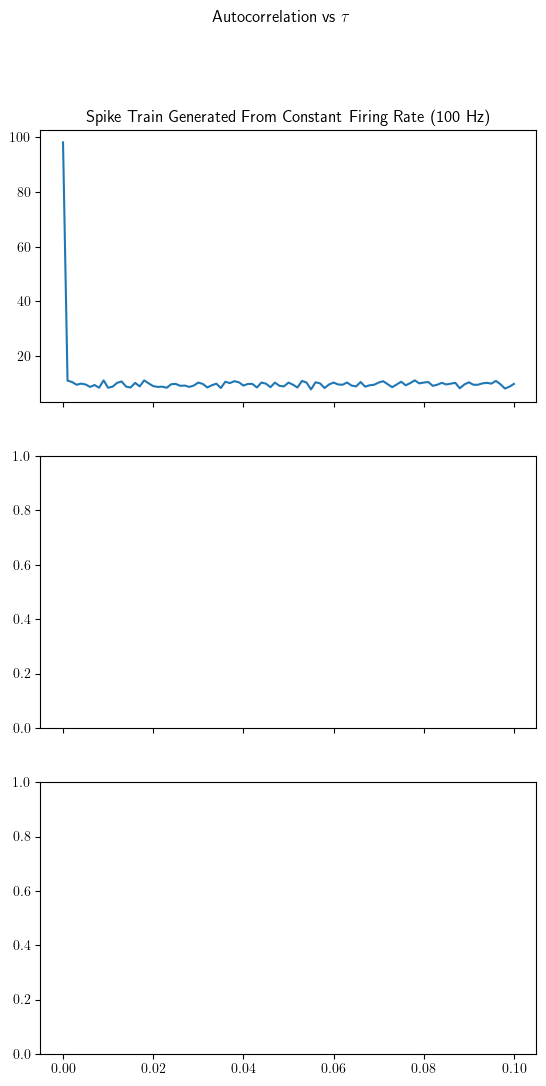

In [17]:
fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.set_figheight(12)
fig.suptitle(r'Autocorrelation vs $\tau$')

taus = [i*0.001 for i in range(101)]

spikes = generate_poisson_spikes(100, 10, 0.001)
auto_corr = [get_spike_train_autocorrelation(spikes, 10, tau) for tau in taus]
axs[0].plot(taus, auto_corr);
axs[0].set_title('Spike Train Generated From Constant Firing Rate (100 Hz)')

spikes = generate_poisson_spikes_with_refractory_period(100, 10, 0.01, 0.001)
auto_corr = [get_spike_train_autocorrelation(spikes, 10, tau) for tau in taus]
axs[1].plot(taus, auto_corr);
axs[1].set_title('Spike Train Generated From Constant Firing Rate (100 Hz)\n' + r'with Refractory Recovery Rate $\tau_{ref}=10$ ms')

r = np.array([100*(1+np.cos(2*np.pi*t*1e-3/0.025)) for t in range(int(10/1e-3))])
spikes = generate_poisson_spikes(r, 10, 0.001)
auto_corr = [get_spike_train_autocorrelation(spikes, 10, tau) for tau in taus]
axs[2].plot(taus, auto_corr);
axs[2].set_title('Spike Train Generated From Variable Firing Rate\n' + r'$r(t) = 100(1+\cos(\frac{2\pi t}{0.025}))$ Hz');


We can see from the plots above that for the constant firing rate the autocorrelation is 0 except when $\tau=0$ indicating that the spike train is not correlated with itself. For the constant firing rate with the refractory period we can see that there is a dip in correlation  for $1\text{ ms} \leq \tau \leq 10 \text{ ms}$, which is expected since a spike is less likely to fire shortly after another spike as been fired due to the refractory period. Finally, for the autocorrelation of the variable firing rate spike train the correlation shows a periodic structure with period 25 ms, which is the same period as the firing rate. 

## Exercise 4

1. Generate a Poisson spike train with a time-dependent firing rate

$$r(t) = 100\left(1 + \cos \left(\frac{2\pi t}{300 \text{ ms}}\right)\right) \text{ Hz}$$

2. Approximate the firing rate from this spike train using a variable $r_\text{approx}$ that satisfies
$$ \tau_\text{approx} \frac{dr_\text{approx}}{dt} = r_\text{approx}$$

except that $r_\text{approx} \rightarrow r_\text{approx} + \frac{1}{\tau_\text{approx}}$ every time a spike occurs. And make plots of:
-  The true rate
-  The spike sequence generated
- The estimated rate. 
3. Experiment with a few different values of $\tau_\text{approx}$ in the range of 1 to 100 ms and determine the best value of approx
by computing the average squared error of the estimate and finding the value of $\tau_\text{approx}$ that minimizes this error.

## Solution 4.1
As in the previous question the spike train can be easily generated by passing an array as the firing rate.

In [ ]:
r = np.array([100*(1+np.cos(2*np.pi*t*1e-5/0.3)) for t in range(int(10/1e-5))])
spikes = generate_poisson_spikes(r, 10, 1e-5)

## Solution 4.2
To approximate the firing rate from the spike train as outlined above we can apply the formula sequentially to calculate the firing rate. 

In [ ]:
def approximate_firing_rate(spikes, T, tau, dt = 1e-5):
    """
    Approximates the firing rate of a spike train.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occured.
    T : float
        The duration of the spike train.
    tau : float
        A parameter controlling how much to alter estimate when spike is observed.
    dt : float
        The temporal resolution of the approximation.

    """
    
    rho = get_neural_response(spikes, T, dt)
    r_est = np.zeros(len(rho))
    for i in range(1, len(r_est)):
        if rho[i] == 1:
            r_est[i] = r_est[i-1] + (1/tau)
        else:
            r_est[i] = r_est[i-1] - (r_est[i-1]*dt/tau)
    return r_est

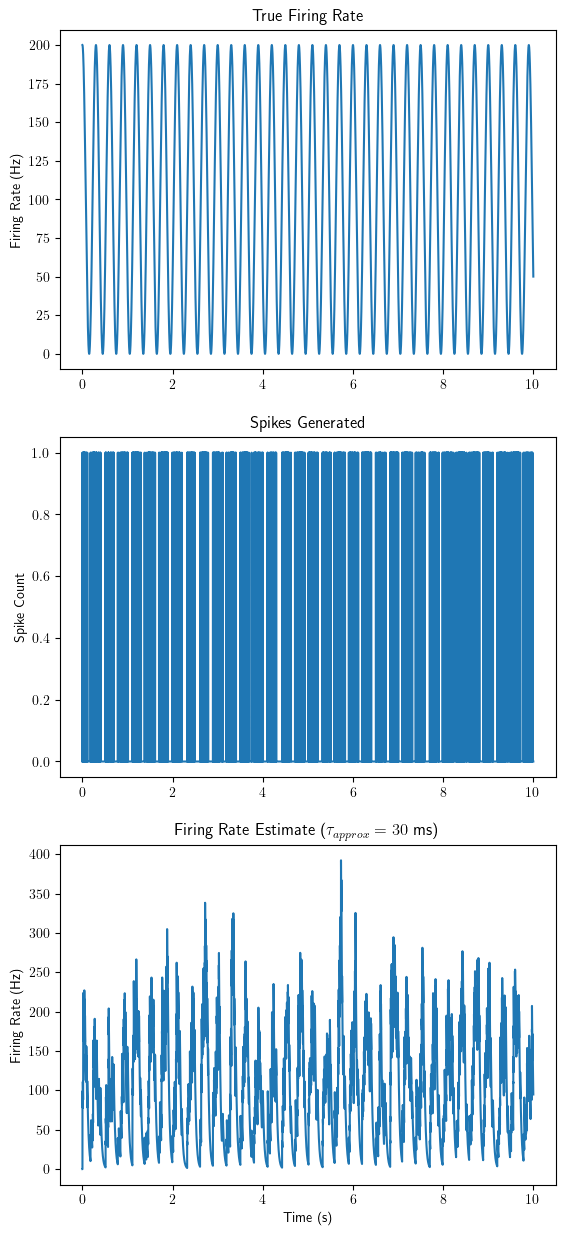

In [ ]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)

r_est = approximate_firing_rate(spikes, 10, 0.03)
rho = get_neural_response(spikes, 10, 1e-5)

time = [i*1e-5 for i in range(int(10/1e-5))]
axs[0].plot(time, r)
axs[0].set_title("True Firing Rate")
axs[0].set_ylabel("Firing Rate (Hz)")

axs[1].plot(time, rho)
axs[1].set_title("Spikes Generated")
axs[1].set_ylabel("Spike Count")
axs[2].plot(time, r_est)
axs[2].set_title(r'Firing Rate Estimate ($\tau_{approx}=30$ ms)')
axs[2].set_ylabel("Firing Rate (Hz)")
axs[2].set_xlabel("Time (s)");

This method of approximating the firing rate from the spike train makes intuitive sense as we lower our estimate of the firing rate every time a spike doesn't occur, and raise it if one does. The value $\tau_\text{approx}$ just determines by how much we raise/lower our estimate.

## Solution 4.3
By approximating the firing rate for various values of $\tau_\text{approx}$ and computing the average squared error of the estimate we can find a value of $\tau_\text{approx}$ that results in the best estimate under this loss function.

In [ ]:
r = np.array([100*(1+np.cos(2*np.pi*t*1e-5/0.3)) for t in range(int(10/1e-5))])
spikes = generate_poisson_spikes(r, 10)
tau_opt = None
min_sq_err = np.Inf
for i in range(1,101):
    tau =i*0.001
    r_est = approximate_firing_rate(spikes, 10, tau, 1e-5)
    sq_err = np.sum(((r - r_est)**2))
    if sq_err < min_sq_err:
        min_sq_err = sq_err
        tau_opt = tau
tau_opt

0.026000000000000002

## Exercise 5
For a constant rate Poisson process, every specific (up to a finite
resolution) sequence of N spikes occurring over a given time interval is equally likely. This seems paradoxical because we certainly do not
expect to see all N spikes appearing within the first 1% of the time interval. Resolve this paradox.

## Solution 5
Since the probability of a spike at any time step is independent of any other whether or not a spike has occured at any other time step the each time step has equal probability of having a spike. If we are told that N spikes occured; then since each time step was equally likely to have a spike and sequence with N spikes would therefore be equally likely.

## Exercise 6
1. Build an approximate white-noise stimulus by choosing random values at discrete times separated by a time-step interval $\Delta t$. 
2. Plot its autocorrelation function and power spectrum. 
3. Discuss how well this stimulus matches an ideal white-noise stimulus given the value of $\Delta t$ used.

## Solution 6.1
To implement this we can draw a sample from a standard normal distribution at each time step.

In [ ]:
def get_approximate_white_noise_stim(T, dt):
    """
    Generates approximate white noise stimulus.

    Parameters
    ----------
    T : float
        The duration of time to generate stimulus for.
    dt : float
        The temporal resolution to use.

    Returns
    -------
    white_noise : array_like
        An array of approximat white noise stimulus.
    """
    
    white_noise = np.random.randn(int(T/dt))
    return white_noise

In [ ]:
white_noise = get_approximate_white_noise_stim(1, 1e-5)

## Solution 6.2
To calculate the autocorrelation of the stimulus we can implement a function analagous to the spike train autocorrelation function from part 4.

In [ ]:
def get_stimulus_autocorrelation(stim, T, dt, tau):
    """
    Calculates the autocorrelation of a stimulus sequence given a lag time.

    Parameters
    ----------
    stim : array_like
        A list of stimulus values.
    T : float
        The duration of the stimulus sequence in seconds.
    dt : float
        The time step size in seconds
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The autocorrelation of the stimulus sequence given a lag of tau.
    """

    s_tau = np.roll(stim, int(tau/dt))
    s = np.mean(stim)

    q = (1/T)*np.sum((stim - s)*(s_tau - s)*dt)

    return q

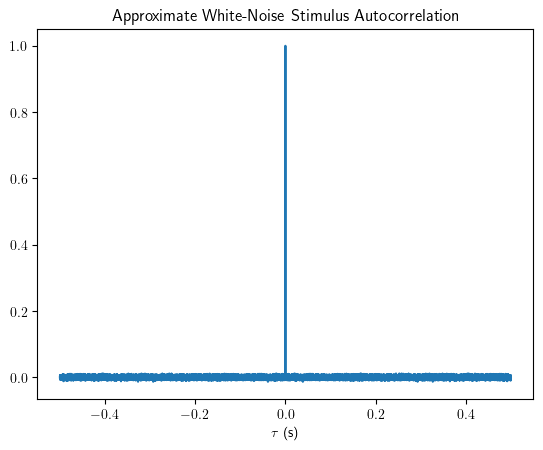

In [ ]:
taus = [i*1e-5 - 1/2 for i in range(int(1/1e-5))]
qss = [get_stimulus_autocorrelation(white_noise, 1, 1e-5, tau) for tau in taus]
plt.plot(taus, qss)
plt.title("Approximate White-Noise Stimulus Autocorrelation")
plt.xlabel(r'$\tau$ (s)');

And to calculate the power spectrum we can just compute the Discrete Fourier Transform.

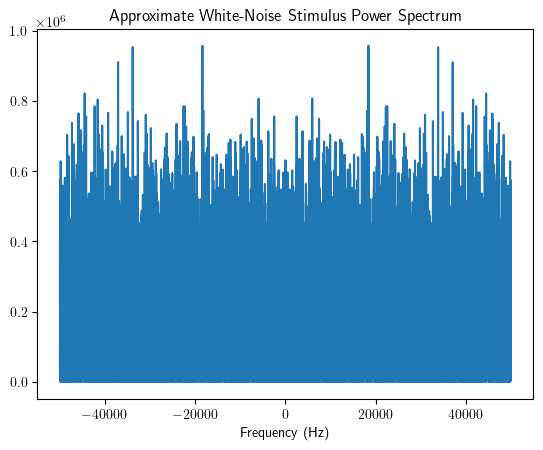

In [ ]:
ps = np.abs(np.fft.fft(white_noise))**2
freqs = np.fft.fftfreq(len(white_noise), 1e-5)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.title("Approximate White-Noise Stimulus Power Spectrum")
plt.xlabel("Frequency (Hz)");

## Exercise 7
1. Consider a model with a firing rate determined in terms of a stimulus $s(t)$ by integrating the equation $\tau_r\frac{d\text{r}_\text{est}(t)}{dt}=[\text{r}_0 + s]_+ - \text{r}_\text{est}(t)$ where $\text{r}_0$ is a constant that determines the background firing rate and  $\tau_r=20$ ms. Drive the model with an approximate white-noise stimulus. Adjust the amplitude of the white-noise and the parameter $\text{r}_0$ so that rectification is not a big effect. 

2. From the responses of the model, compute the stimulus-response correlation function, $Q_{rs}$. 

3. Generate spikes from this model using a Poisson generator with a rate $\text{r}_\text{est}(t)$, and compute the spike-triggered average stimulus from the spike trains produced by the white-noise stimulus. 
4. By comparing the stimulus-response correlation function with the spike-triggered average, verify that equation 1.22 is satisfied. 
5. Examine what happens if you set $\text{r}_0=0$, so that the white-noise stimulus becomes half-weave rectified.

## Solution 7.1
To implement this model we must first generate the firing rate as described based on some stimulus s.

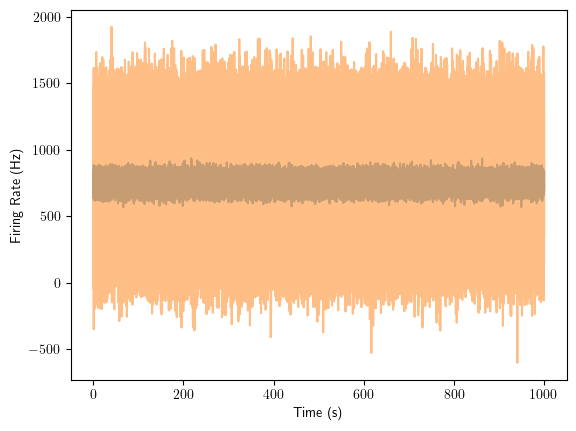

In [ ]:
tau_r = 0.02
r_0 = 750
A = 250
T = 1000
dt = 1e-3

s = A*get_approximate_white_noise_stim(T, dt)
r_est = np.zeros(int(T/dt))
r_est[0] = r_0
for i in range(1, len(r_est)):
    r_est[i] = r_est[i-1] + (max(r_0+s[i], 0) - r_est[i-1])*dt/tau_r
plt.plot([i*dt for i in range(int(T/dt))], r_est, alpha=0.5)
plt.plot([i*dt for i in range(int(T/dt))], s + r_0, alpha = 0.5)
plt.ylabel("Firing Rate (Hz)")
plt.xlabel("Time (s)");

## Solution 7.2
Next we can write a function that's nearly identical to the stimulus autocorrelation function to measure the firing-rate stimulus correlation. 

In [ ]:
def get_firing_rate_stimulus_correlation(s, r, T, dt, tau):
    """
    Calculates the correlation of a firing rate and stimulus given a lag time.

    Parameters
    ----------
    s : array_like
        A list of stimulus values.
    r : array_like
        The firing rate in Hz.
    T : float
        The duration of the stimulus sequence in seconds.
    dt : float
        The time step size in seconds
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The correlation of the firing rate and stimulus sequence given a lag of tau.
    """

    s_tau = np.roll(s, int(tau/dt))

    q = (1/T)*np.sum(r*s_tau*dt)

    return q

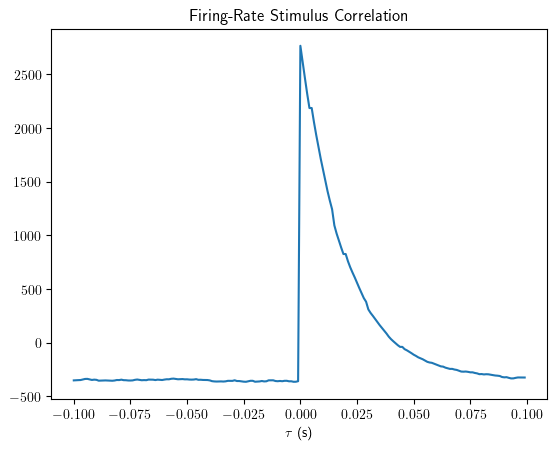

In [ ]:
taus = [i*dt - 0.1 for i in range(int(0.2/dt))]
qrs = [get_firing_rate_stimulus_correlation(s, r_est, T, dt, tau) for tau in taus]
plt.plot(taus, qrs)
plt.title("Firing-Rate Stimulus Correlation")
plt.xlabel(r'$\tau$ (s)');

## Solution 7.3
To solve this step of the problem we need to generate the spike train as described, and implement a function to calculate the spike-triggered average of a spike train.

In [ ]:
def get_spike_triggered_average(rho, stim, T, dt, tau):
    """
    Calculates the spike-triggered average stimulus.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    stim : array_like
        The stimulus array.
    T : float
        The duration of the spike train in seconds.
    dt : float
        The temporal resolution of the stimulus array.
    tau : float
        The time lag to calculate the spike-triggered average for in seconds.

    Returns
    -------
    C : float
        The spike-triggered average stimulus.
    """

    n = sum(rho)
    s_tau = np.roll(stim, -int(tau/dt))
    C = (1/n)*np.sum(s_tau * rho)

    return C

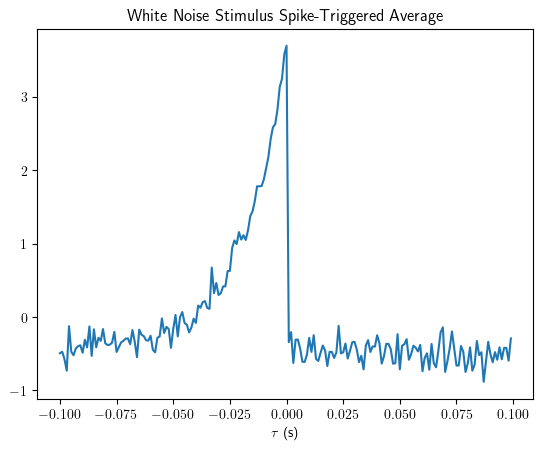

In [ ]:
spikes = generate_poisson_spikes(r_est, T, dt)
rho = get_neural_response(spikes, T, dt)
taus = [i*dt - 0.1 for i in range(int(0.2/dt))]
sta = [get_spike_triggered_average(rho, s, T, dt, tau) for tau in taus]
plt.plot(taus, sta)
plt.title("White Noise Stimulus Spike-Triggered Average")
plt.xlabel(r'$\tau$ (s)');

## Solution 7.4
Equation 1.22 claims that $$C(\tau)=\frac{1}{\langle r \rangle}Q_{rs}(-\tau)$$. To verify that this holds for our data we can simply plot the left and right hand side of the equaiton.

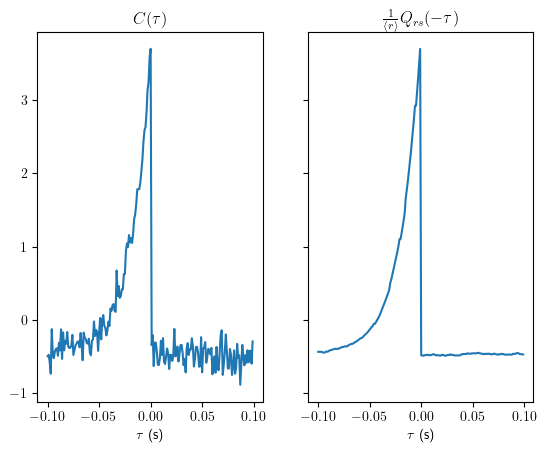

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
axs[0].plot(taus, sta)
axs[0].set_title(r'$C(\tau)$')
axs[0].set_xlabel(r'$\tau$ (s)');
axs[1].plot(taus, (T/np.sum(rho)) * np.flip(qrs))
axs[1].set_title(r'$\frac{1}{\langle r \rangle} Q_{rs}(-\tau)$')
axs[1].set_xlabel(r'$\tau$ (s)');

Since these plots are nearly identical (excluding noise since we only simulated a finite amount of time) we can conclude that equation 1.22 holds.

## Solution 7.5
Setting $r_0=0$ yields the following.

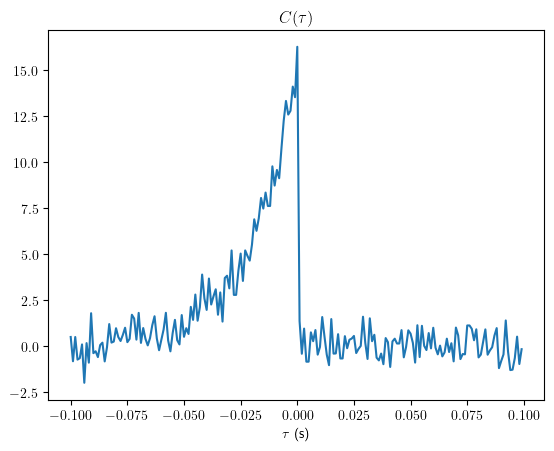

In [ ]:
tau_r = 0.02
r_0 = 0
A = 250
T = 1000
dt = 1e-3

s = A*get_approximate_white_noise_stim(T, dt)
r_est = np.zeros(int(T/dt))
r_est[0] = r_0
for i in range(1, len(r_est)):
    r_est[i] = r_est[i-1] + (max(r_0+s[i], 0) - r_est[i-1])*dt/tau_r

taus = [i*dt - 0.1 for i in range(int(0.2/dt))]
spikes = generate_poisson_spikes(r_est, T, dt)
rho = get_neural_response(spikes, T, dt)
sta = [get_spike_triggered_average(rho, s, T, dt, tau) for tau in taus]

plt.plot(taus, sta)
plt.title(r'$C(\tau)$')
plt.xlabel(r'$\tau$ (s)');

We can see that the spike-triggered average is much higher that before. This makes intuitive sense as before the backround firing rate $r_0$ would cancel out some of the impact of the stimulus having a negative value.